In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
import pandas as pd
import numpy as np
from src.vae_torch import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
batch_size = 256
learning_rate = 0.05
middle_layer_size = 100
input_size = 28*28*1
latent_dim = 20
n_epochs = 100

In [7]:
model = VAE(input_size,middle_layer_size, latent_dim)

In [8]:
import os

In [11]:
path_data = os.path.join(os.getcwd(), "data", "mnist_train.csv")
data_train = pd.read_csv(path_data)


In [22]:
df = data_train[data_train['label'].isin(labels)]
torch.Tensor(df['label'].values)

tensor([2., 2., 2.,  ..., 2., 2., 2.])

In [23]:
mnist_trainset = Dataset("c:\\Users\\32mor\\OneDrive\\Documents\\IPP M2\\DL2\\DL_2_project\\tristan\\data\\mnist_train.csv", labels=[2])
mnist_testset = Dataset("c:\\Users\\32mor\\OneDrive\\Documents\\IPP M2\\DL2\\DL_2_project\\tristan\\data\\mnist_test.csv", labels=[2])
mnist_train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size, shuffle=True,
                                                    drop_last=True)
mnist_test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size, shuffle=True,
                                                    drop_last=True)

In [24]:
train_model(model, learning_rate, mnist_train_loader,batch_size, n_epochs)

[*] Epoch 0, average loss : 340.19509351921783
[*] Epoch 1, average loss : 207.5937755696123
[*] Epoch 2, average loss : 204.79028918575864
[*] Epoch 3, average loss : 203.355235345334
[*] Epoch 4, average loss : 202.82505730215675
[*] Epoch 5, average loss : 202.4016153438654
[*] Epoch 6, average loss : 202.20864869188486
[*] Epoch 7, average loss : 201.92984354019805
[*] Epoch 8, average loss : 202.05747393210808
[*] Epoch 9, average loss : 202.00237994083585
[*] Epoch 10, average loss : 201.77090610838368
[*] Epoch 11, average loss : 201.60088719998322
[*] Epoch 12, average loss : 201.54254062290198
[*] Epoch 13, average loss : 201.34820763574186
[*] Epoch 14, average loss : 201.2727333522155
[*] Epoch 15, average loss : 201.29846818353474
[*] Epoch 16, average loss : 201.35181950738502
[*] Epoch 17, average loss : 201.05029477173548
[*] Epoch 18, average loss : 201.09996931646526
[*] Epoch 19, average loss : 201.10599194360523
[*] Epoch 20, average loss : 200.98204882091306
[*] Epo

In [25]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
# plt.imshow(images[0].view(28,28,1).detach().numpy())

In [42]:
images = generate_data(model, 5)
fig, axes = plt.subplots(1,5, figsize=(30,10))
for i in range(5):
    axes[i].imshow(images[i].view(28,28,1).detach().numpy())
plt.savefig("images_VAE_only_twos.png")

AttributeError: 'DBN' object has no attribute 'latent_dim'

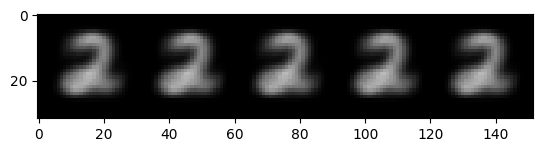

In [28]:

grid_img = make_grid(images.view([5,1,28,28]).detach())
plt.imshow(grid_img.permute(1, 2, 0), cmap='viridis')
# plt.title('Images Generated with VAE')

In [31]:
from src.dbn import DBN
from src.data import lire_mnist

X_train, y_train, X_test, y_test = lire_mnist("data/mnist_train.csv", "data/mnist_test.csv")
model = DBN([784, 100, 100])

In [125]:
model.train(X_train,0.1, 1000, 100)

Epoch 0, erreur quadratique moyenne de reconstruction : 0.070894
Epoch 1, erreur quadratique moyenne de reconstruction : 0.059003
Epoch 2, erreur quadratique moyenne de reconstruction : 0.053456
Epoch 3, erreur quadratique moyenne de reconstruction : 0.049735


In [30]:
from src.rbm import RBM
from src.data import lire_alpha_digits
from src.utils import display_alpha_digits

In [32]:
rbm_mnist = RBM(784,200)

In [33]:
learning_rate = 0.01

In [51]:
X_twos = X_train[np.argwhere(y_train.argmax(axis=1)==1)]
X_twos = np.squeeze(X_twos,axis=1)

In [49]:
X_train.shape

(60000, 784)

In [52]:
X_twos.shape

(6742, 784)

In [53]:

rbm_mnist.train(X_train,learning_rate, batch_size, n_epochs)

Epoch 0, erreur quadratique moyenne de reconstruction : 0.034570
Epoch 1, erreur quadratique moyenne de reconstruction : 0.031568
Epoch 2, erreur quadratique moyenne de reconstruction : 0.028162
Epoch 3, erreur quadratique moyenne de reconstruction : 0.025937
Epoch 4, erreur quadratique moyenne de reconstruction : 0.024792
Epoch 5, erreur quadratique moyenne de reconstruction : 0.024063
Epoch 6, erreur quadratique moyenne de reconstruction : 0.023490
Epoch 7, erreur quadratique moyenne de reconstruction : 0.022977
Epoch 8, erreur quadratique moyenne de reconstruction : 0.022502
Epoch 9, erreur quadratique moyenne de reconstruction : 0.022080
Epoch 10, erreur quadratique moyenne de reconstruction : 0.021718
Epoch 11, erreur quadratique moyenne de reconstruction : 0.021390
Epoch 12, erreur quadratique moyenne de reconstruction : 0.021107
Epoch 13, erreur quadratique moyenne de reconstruction : 0.020889
Epoch 14, erreur quadratique moyenne de reconstruction : 0.020696
Epoch 15, erreur qua

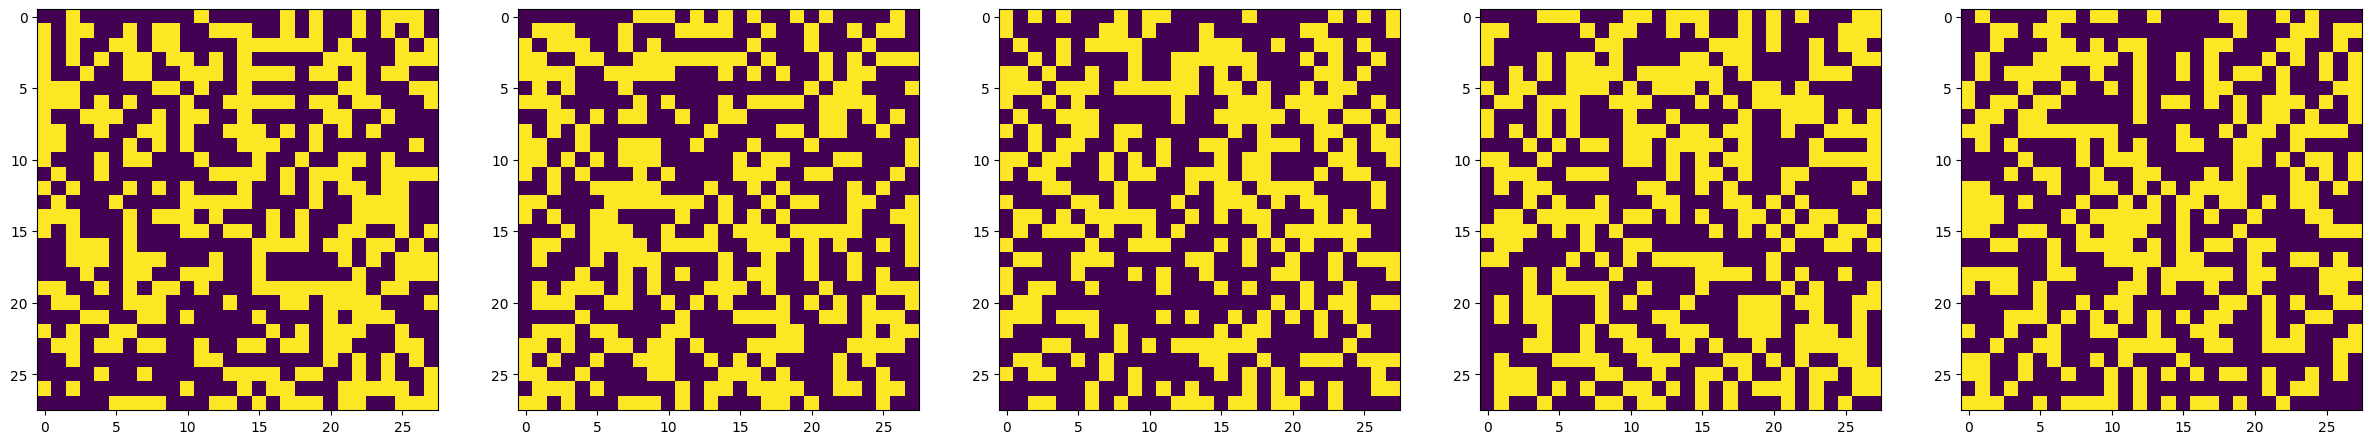

In [55]:
images_rbm = rbm_mnist.generer_image(10, 5)
fig, axes = plt.subplots(1,5, figsize=(30,10))
for i in range(5):
    axes[i].imshow(images_rbm[i].reshape(28,28,1))
plt.savefig("images_rbm_mnist_twos.png")

In [56]:
dbn_mnist = DBN([784,150, 150])
dbn_mnist.train(X_train, learning_rate, batch_size, n_epochs)

Epoch 0, erreur quadratique moyenne de reconstruction : 0.084122
Epoch 1, erreur quadratique moyenne de reconstruction : 0.069620
Epoch 2, erreur quadratique moyenne de reconstruction : 0.062581
Epoch 3, erreur quadratique moyenne de reconstruction : 0.058296
Epoch 4, erreur quadratique moyenne de reconstruction : 0.055450
Epoch 5, erreur quadratique moyenne de reconstruction : 0.053049
Epoch 6, erreur quadratique moyenne de reconstruction : 0.050925
Epoch 7, erreur quadratique moyenne de reconstruction : 0.049161
Epoch 8, erreur quadratique moyenne de reconstruction : 0.047611
Epoch 9, erreur quadratique moyenne de reconstruction : 0.046238
Epoch 10, erreur quadratique moyenne de reconstruction : 0.045002
Epoch 11, erreur quadratique moyenne de reconstruction : 0.043866
Epoch 12, erreur quadratique moyenne de reconstruction : 0.042852
Epoch 13, erreur quadratique moyenne de reconstruction : 0.041922
Epoch 14, erreur quadratique moyenne de reconstruction : 0.041055
Epoch 15, erreur qua

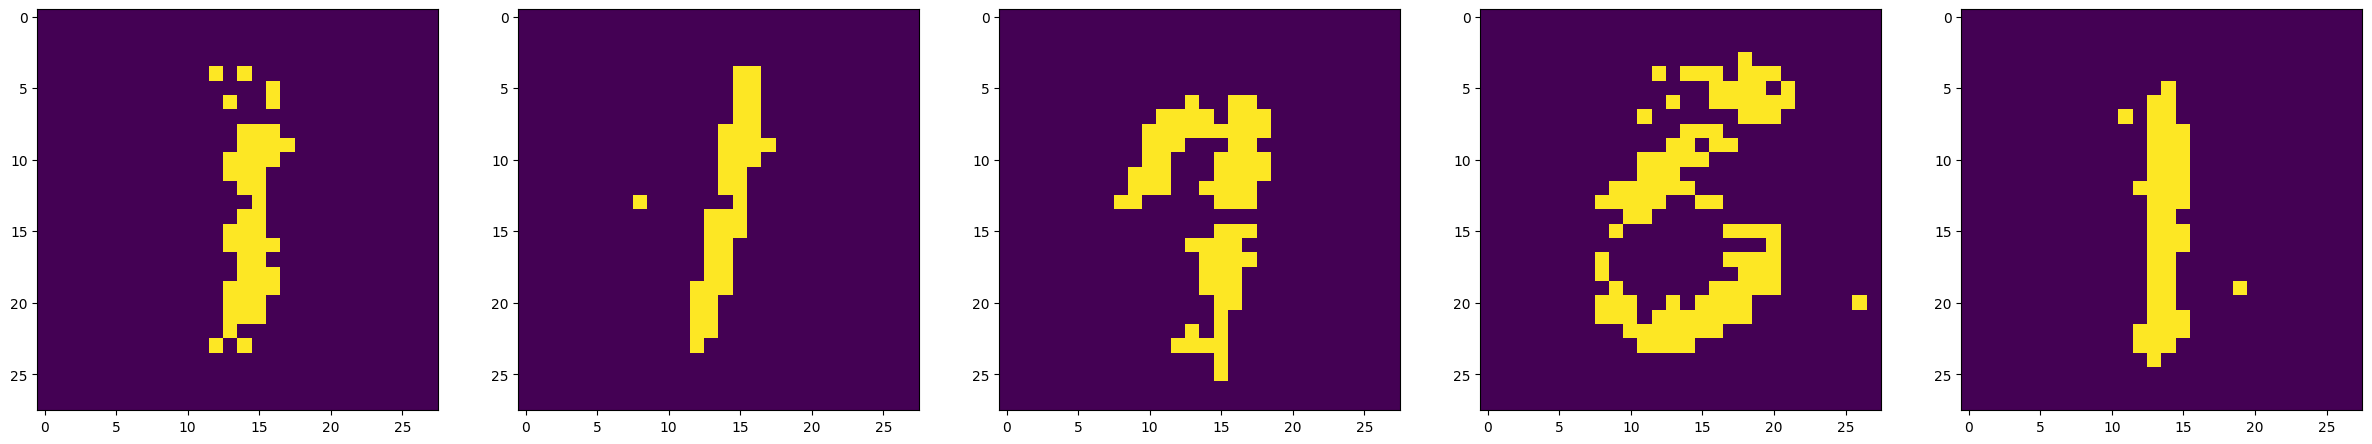

In [63]:
images_dbn = dbn_mnist.generer_image(30, 10)


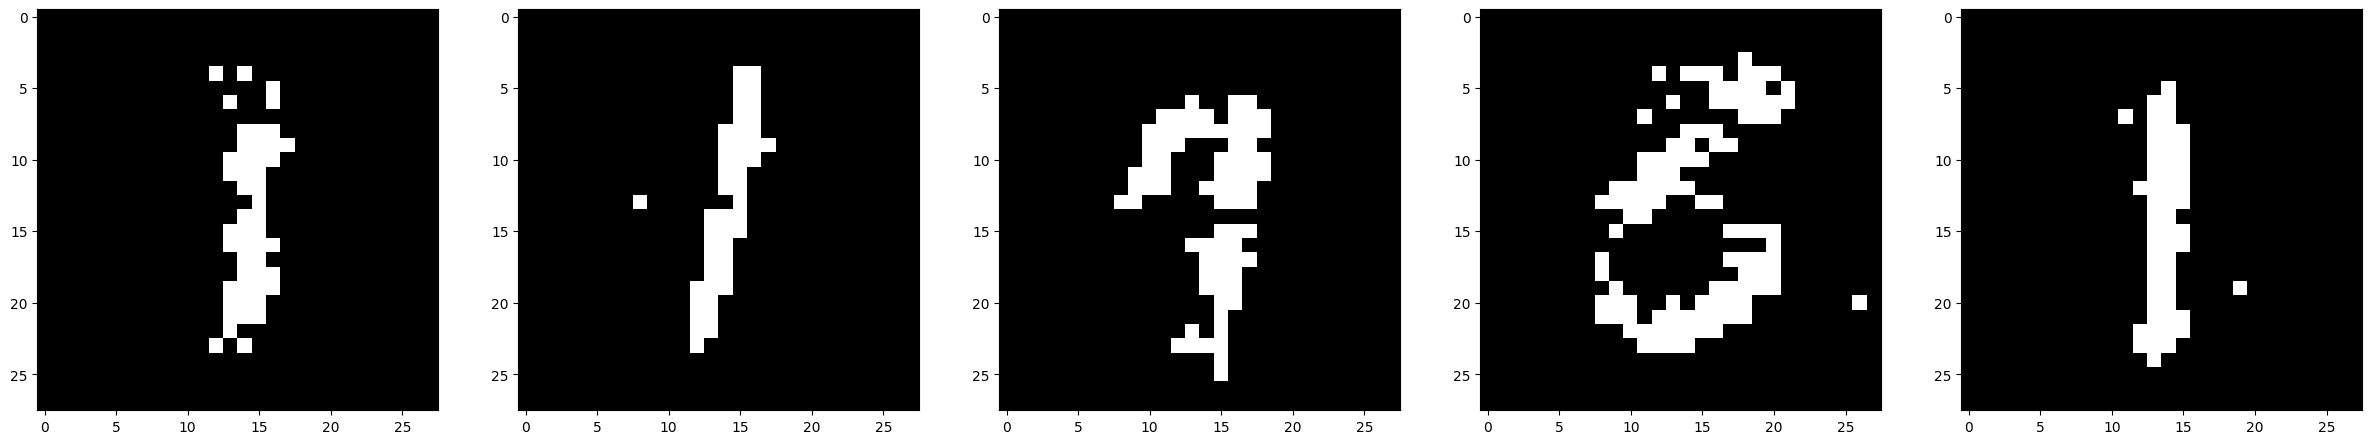

In [69]:
fig, axes = plt.subplots(1,5, figsize=(30,10))
for i in range(5):
    axes[i].imshow(images_dbn[i].reshape(28,28,1), cmap='gray')
plt.savefig("dbn_mnist_images.png")